In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import glob
import subprocess

In [2]:
with open("EVCS_14_F.gms","r") as f:
    list_of_lines = f.readlines()
    
    
list_of_lines[14]

"grid_limit 'Desired max power from grid kW' /170/\n"

In [15]:
limits = [150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]
ex_limits =[100, 110, 120, 130, 140, 350, 370]

In [16]:
for i in range(len(ex_limits)):
    
    with open("EVCS_14_F.gms","r") as f:
        list_of_lines = f.readlines()
        
    list_of_lines[36] = '$include demand_winter_reduced27december.tsv\n'
    
    list_of_lines[14] = "grid_limit 'Desired max power from grid kW' /" + str(ex_limits[i]) + "/\n"
    
    print(list_of_lines[14])
    
    with open("EVCS_14_F.gms", "w") as f:
        f.writelines(list_of_lines)
        
    subprocess.run(["gams", "EVCS_14_F.gms", "logOption", "2"])
    
    subprocess.run(["move", "EVCS_14_F_results.db", "EVCS_14_F_M2_results_" + str(ex_limits[i]) + ".db"], shell = True)
    
    print(ex_limits[i])

grid_limit 'Desired max power from grid kW' /100/

100
grid_limit 'Desired max power from grid kW' /110/

110
grid_limit 'Desired max power from grid kW' /120/

120
grid_limit 'Desired max power from grid kW' /130/

130
grid_limit 'Desired max power from grid kW' /140/

140
grid_limit 'Desired max power from grid kW' /350/

350
grid_limit 'Desired max power from grid kW' /370/

370


In [17]:
#Extract result data from all result databases and create dataframes for each variable

grid_p = pd.DataFrame()
grid_ex_p = pd.DataFrame()
grid_tot_p = pd.DataFrame()

soc_pen = pd.DataFrame()

grid_e = pd.DataFrame()
grid_ex_e = pd.DataFrame()

ESS_lvl = pd.DataFrame()
ESS_p = pd.DataFrame()

sclrs = pd.DataFrame()

for filename in glob.glob('EVCS_14_F_M2_results*.db'):
    con = sqlite3.connect(filename)
    
    grid_power = pd.read_sql_query("SELECT * FROM var_grid_power", con)
    grid_extra_power = pd.read_sql_query("SELECT * FROM var_grid_ex_power", con)
    grid_total_power = pd.read_sql_query("SELECT * FROM var_grid_total_power", con)
    
    grid_energy = pd.read_sql_query("SELECT * FROM var_grid_energy", con)
    grid_extra_energy = pd.read_sql_query("SELECT * FROM var_grid_ex_energy", con)
    
    ESS_level = pd.read_sql_query('SELECT * FROM var_ESS_level', con)
    ESS_power = pd.read_sql_query('SELECT * FROM var_ESS_power', con)
    
    scalars =  pd.read_sql_query('SELECT * FROM scalarvariables', con)
    
    soc_penalty = pd.read_sql_query('SELECT * FROM var_SOC_pen', con)
    
    con.close()
    
    grid_p[filename[21:-3]] = grid_power['level'].copy()
    grid_ex_p[filename[21:-3]] = grid_extra_power['level'].copy()
    grid_tot_p[filename[21:-3]] = grid_total_power['level'].copy()
    
    grid_e[filename[21:-3]] = grid_energy['level'].copy()
    grid_ex_e[filename[21:-3]] = grid_extra_energy['level'].copy() 
    
    ESS_lvl[filename[21:-3]] = ESS_level['level'].copy()
    ESS_p[filename[21:-3]] = ESS_power['level'].copy()  
    
    sclrs[filename[21:-3]] = scalars['level'].copy()
    
    soc_pen[filename[21:-3]] = soc_penalty['level'].copy()



In [18]:
#Scalar variables are collected in one DF. In this cell this df is cleaned and sorted

sclrs = sclrs.set_index(scalars['name'])
sclrs1 = sclrs.T
sclrs1['var_ESS_size'] = sclrs1['var_ESS_size'] * 1.25
sclrs1.index = sclrs1.index.astype(int)
sclrs1 = sclrs1.sort_index(ascending = True)
#sclrs1['Battery Investment Costs'] = np.array(capcost)
sclrs1

name,var_ess_rated_power,var_grid_maxpower,var_ESS_cost,var_electricity_cost,var_grid_tariff_winter,var_energy_tax,months,var_system_cost,var_ESS_size
100,176.496249,222.973751,31063.339806,108353.006061,64592.601567,3585.89209,4.283482,217754.810280,176.496249
110,176.496249,222.973751,31063.339806,104321.606883,64578.491669,3585.89209,4.283482,212717.270053,176.496249
120,176.496249,222.973751,31063.339806,101331.306470,64568.025618,3585.89209,4.283482,208627.047776,176.496249
130,176.496249,222.973751,31063.339806,99047.103343,64560.030907,3585.89209,4.283482,205315.256819,176.496249
140,176.496249,222.973751,31063.339806,97409.087943,64554.297853,3585.89209,4.283482,202625.702225,176.496249
150,176.496249,222.973751,31063.339806,96055.224606,64549.559332,3585.89209,4.283482,200457.394456,176.496249
160,176.496249,222.973751,31063.339806,95104.908343,64546.233225,3585.89209,4.283482,198743.017874,176.496249
170,176.496249,222.973751,31063.339806,94350.454186,64543.592635,3585.89209,4.283482,197376.274952,176.496249
180,176.496249,222.973751,31063.339806,93787.890226,64541.623661,3585.89209,4.283482,196274.148419,176.496249
190,176.496249,222.973751,31063.339806,93378.382925,64540.190386,3585.89209,4.283482,195407.552479,176.496249


In [7]:
grid_p

,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Battery Use and Distribution

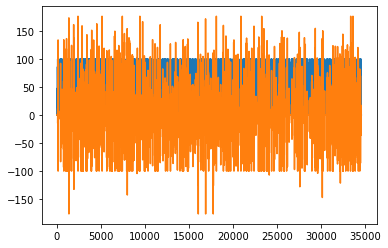

In [21]:
plt.plot(grid_p['100'])
plt.plot(ESS_p['100'])

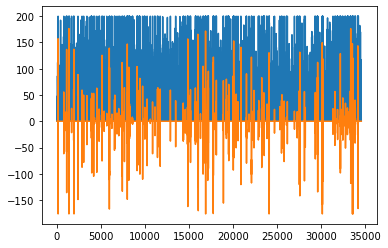

In [23]:
plt.plot(grid_p['200'])
plt.plot(ESS_p['200'])

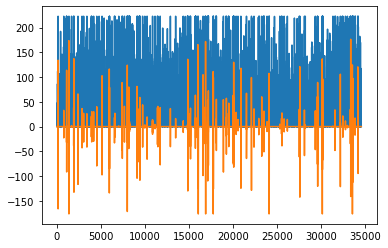

In [22]:
plt.plot(grid_p['300'])
plt.plot(ESS_p['300'])

Battery is used significantly more with lower limit

In [24]:
battery_1 = ESS_p['100']
battery_2 = ESS_p['200']
battery_3 = ESS_p['300']

discharge_1 = []
charge_1 = []
discharge_2 = []
charge_2 = []
discharge_3 = []
charge_3 = []

for i in range(len(battery_1)):
    if battery_1[i] < 0:
        charge_1.append(battery_1[i])
    elif battery_1[i] > 0:
        discharge_1.append(battery_1[i])
        
for i in range(len(battery_2)):
    if battery_2[i] < 0:
        charge_2.append(battery_2[i])
    elif battery_2[i] > 0:
        discharge_2.append(battery_2[i])
        
for i in range(len(battery_3)):
    if battery_3[i] < 0:
        charge_3.append(battery_3[i])
    elif battery_3[i] > 0:
        discharge_3.append(battery_3[i])
        

In [29]:
sum1 = sum(discharge_1)
sum2 = sum(discharge_2)
sum3 = sum(discharge_3)

print(sum1, sum2, sum3)

120604.90599073254 26051.6011650486 17114.54706972643


Text(0.5, 0, 'ESS Discharge Power [kW]')

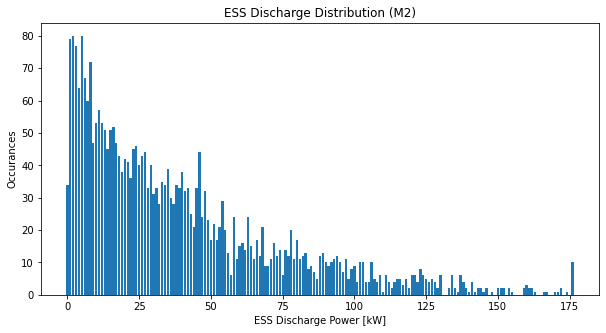

In [33]:
a = [round(num,0) for num in discharge_1]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names = list(aa.keys())
times = list(aa.values())

plt.figure(figsize = (10,5))
plt.bar(names, times)
plt.title('ESS Discharge Distribution (M2)')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')

Text(0.5, 0, 'ESS Discharge Power [kW]')

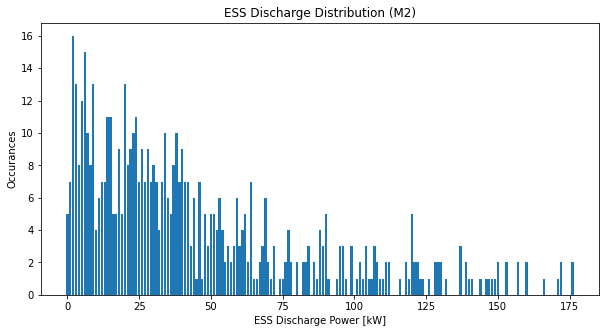

In [35]:
a = [round(num,0) for num in discharge_2]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names = list(aa.keys())
times = list(aa.values())

plt.figure(figsize = (10,5))
plt.bar(names, times)
plt.title('ESS Discharge Distribution (M2)')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')

Text(0.5, 0, 'ESS Discharge Power [kW]')

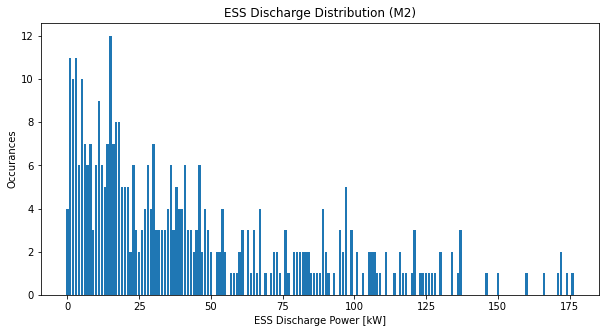

In [34]:
a = [round(num,0) for num in discharge_3]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names = list(aa.keys())
times = list(aa.values())

plt.figure(figsize = (10,5))
plt.bar(names, times)
plt.title('ESS Discharge Distribution (M2)')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')

Text(0.5, 0, 'ESS Discharge Power [kW]')

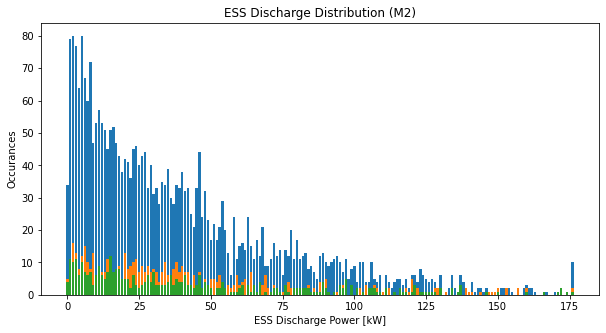

In [36]:
a = [round(num,0) for num in discharge_1]
from collections import Counter
aa = Counter(a)
aa = dict(aa)
names1 = list(aa.keys())
times1 = list(aa.values())

b = [round(num,0) for num in discharge_2]
bb = Counter(b)
bb = dict(bb)
names2 = list(bb.keys())
times2 = list(bb.values())

c = [round(num,0) for num in discharge_3]
cc = Counter(c)
cc = dict(cc)
names3 = list(cc.keys())
times3 = list(cc.values())



plt.figure(figsize = (10,5))
plt.bar(names1, times1)
plt.bar(names2, times2)
plt.bar(names3, times3)
plt.title('ESS Discharge Distribution (M2)')
plt.ylabel('Occurances')
plt.xlabel('ESS Discharge Power [kW]')